<a href="https://colab.research.google.com/github/Raj0978/Parcil_Safety/blob/Product-%26-Customer/Mask_%26_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
shopify=pd.read_excel('Shopify_CustomerSales.xlsx')

In [ ]:
shopify.shape

(39139, 21)

In [ ]:
shopify.dtypes

Date                datetime64[ns]
product_title               object
variant_title               object
variant_sku                 object
order_id                     int64
customer_id                  int64
customer_name               object
customer_type               object
customer_email              object
sale_kind                   object
shipping_city               object
shipping_region             object
shipping_country            object
net_quantity                 int64
gross_sales                float64
discounts                  float64
returns                    float64
net_sales                  float64
taxes                      float64
total_sales                float64
customers                    int64
dtype: object

In [ ]:
shopify.isna().sum()

Date                    0
product_title           0
variant_title       26258
variant_sku           630
order_id                0
customer_id             0
customer_name         175
customer_type         159
customer_email        317
sale_kind               0
shipping_city          18
shipping_region       157
shipping_country       18
net_quantity            0
gross_sales             0
discounts               0
returns                 0
net_sales               0
taxes                   0
total_sales             0
customers               0
dtype: int64

In [ ]:
shopify.dropna(subset=['variant_sku'],inplace=True)

In [ ]:
shopify.dropna(subset=['shipping_region'],inplace=True)

In [ ]:
shopify.isna().sum()

Date                    0
product_title           0
variant_title       25827
variant_sku             0
order_id                0
customer_id             0
customer_name         170
customer_type         154
customer_email        293
sale_kind               0
shipping_city           0
shipping_region         0
shipping_country        0
net_quantity            0
gross_sales             0
discounts               0
returns                 0
net_sales               0
taxes                   0
total_sales             0
customers               0
dtype: int64

In [ ]:
shopify['Date']=pd.to_datetime(shopify['Date'])

In [ ]:
# shopify=shopify[shopify['shipping_region']=='Pennsylvania']
# shopify.shape

## PD-100 & P-A-1


In [ ]:
pattern=r'PD-100|P-A-1.*'
filtered_df = shopify[shopify['variant_sku'].str.contains(pattern,regex=True,na=False)]
filtered_df.isna().sum()



Date                   0
product_title          0
variant_title       3814
variant_sku            0
order_id               0
customer_id            0
customer_name          7
customer_type          4
customer_email        31
sale_kind              0
shipping_city          0
shipping_region        0
shipping_country       0
net_quantity           0
gross_sales            0
discounts              0
returns                0
net_sales              0
taxes                  0
total_sales            0
customers              0
dtype: int64

In [ ]:
# Create a custom function to calculate the average time difference
def calculate_average_time_difference(series):
    valid_diff = series[~((series.isna()) | (series == pd.Timedelta(0)))]
    if valid_diff.size > 0:
        return valid_diff.mean()
    else:
        return pd.NA

# Sort the data by customer_id and Date
sorted_df = shopify.sort_values(['customer_id', 'Date'])

# Add a column to indicate the previous SKU for each customer
sorted_df['prev_sku'] = sorted_df.groupby('customer_id')['variant_sku'].shift(1)

# Filter out rows where the SKU is 'P-A-1' (filter purchase) and the previous SKU is 'PD-100' (mask purchase)
mask_filter_pairs = sorted_df[sorted_df['variant_sku'].str.contains('P-A-1', na=False) & (sorted_df['prev_sku'].str.contains('PD-100',na=False))]

# Convert the 'Date' column to datetime type
mask_filter_pairs['Date'] = pd.to_datetime(mask_filter_pairs['Date'])

# Calculate the time difference between mask and filter purchase for each customer
mask_filter_pairs['time_difference'] = mask_filter_pairs.groupby('customer_id')['Date'].diff()

# Filter out rows with invalid date differences (NaT)
mask_filter_pairs = mask_filter_pairs[~mask_filter_pairs['time_difference'].isnull()]

# Calculate the overall average time difference
average_time_difference = calculate_average_time_difference(mask_filter_pairs['time_difference'])


In [ ]:
average_time_difference

Timedelta('76 days 12:37:53.684210526')

In [ ]:
grouped = filtered_df.groupby('customer_id')

# Initialize counters
total_mask_purchases = 0
filter_after_mask_purchases = 0

# Iterate over the groups
for _, group in grouped:
    # Check if the group contains a "Mask" purchase
    if 'PD-100' in group['variant_sku'].values:
        total_mask_purchases += 1

        # Check if the group contains a filter purchase (with a wildcard pattern)
        if group['variant_sku'].str.contains('P-A-1').any():
            filter_after_mask_purchases += 1

# Calculate the percentage
percentage = (filter_after_mask_purchases / total_mask_purchases) * 100


In [ ]:
average_time_difference

Timedelta('76 days 12:37:53.684210526')

In [ ]:
percentage

31.96974905465796

In [ ]:
# filtered_df=filtered_df[filtered_df['billing_region'].isin(['California','Texas','Florida','New York'])]

In [ ]:
# from google.colab import files
# results_df.to_excel('Filter_Mask.xlsx',index=False)

In [ ]:
# files.download('Filter_Mask.xlsx')

In [ ]:
# Define the top 10 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Georgia', 'Washington', 'North Carolina', 'Ohio', 'Tennessee']

# Create a custom function to calculate the average time difference
def calculate_average_time_difference(series):
    valid_diff = series[~((series.isna()) | (series == pd.Timedelta(0)))]
    if valid_diff.size > 0:
        return valid_diff.mean()
    else:
        return pd.NA

# Filter the data for the top states only
filtered_data = shopify[shopify['shipping_region'].isin(top_states)]

# Calculate the total number of mask purchases and the number of customers who bought filters after masks for each state
total_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('PD-100', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Use str.contains with the pipe operator for filter_after_mask_purchases calculation
filter_after_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('P-A-1', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Calculate the time difference between mask and filter purchase for each state
filtered_data['prev_sku'] = filtered_data.groupby('customer_id')['variant_sku'].shift(1)
filtered_data['time_difference'] = filtered_data.groupby('customer_id')['Date'].diff()
mask_filter_pairs = filtered_data[filtered_data['prev_sku'].str.contains('PD-100', na=False)]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['variant_sku'].str.contains('P-A-1', na=False)]

# Calculate the time difference for different-day purchases for each state
mask_filter_pairs['time_difference_diff'] = mask_filter_pairs[mask_filter_pairs['time_difference'] != pd.Timedelta(0)].groupby('customer_id')['time_difference'].transform(calculate_average_time_difference)

# Calculate the time difference for same-day purchases for each state
same_day_purchases = mask_filter_pairs[mask_filter_pairs['time_difference'] == pd.Timedelta(0)]
same_day_purchases['time_difference_same_day'] = pd.Timedelta(0)

# Combine the 'Average Number of Days' and 'Same day average time difference' for each state
combined_time_differences = pd.concat([mask_filter_pairs.groupby('shipping_region')['time_difference_diff'].mean(), same_day_purchases.groupby('shipping_region')['time_difference_same_day'].mean()], axis=1)
combined_time_differences['Combined Average Days'] = combined_time_differences.mean(axis=1)

# Calculate the conversion percentage for each state
percentage = (filter_after_mask_purchases / total_mask_purchases) * 100

# Create the results DataFrame
results_PD100 = pd.DataFrame({
    'State': combined_time_differences.index,
    'Average Number of Days': combined_time_differences['Combined Average Days'],
    'Percentage': percentage,
    'Total Mask': total_mask_purchases,
    'Total Filter': filter_after_mask_purchases
}).reset_index(drop=True)


In [ ]:
results_PD100

,State,Average Number of Days,Percentage,Total Mask,Total Filter
0,California,49 days 17:00:00,43.030303,495,213
1,Florida,34 days 06:00:00,39.416058,274,108
2,Georgia,10 days 12:00:00,37.241379,145,54
3,New York,84 days 20:00:00,45.320197,203,92
4,North Carolina,8 days 12:00:00,45.185185,135,61
5,Ohio,-2 days +18:00:00,49.549550,111,55
6,Pennsylvania,80 days 21:36:00,44.198895,181,80
7,Tennessee,123 days 06:00:00,52.439024,82,43
8,Texas,17 days 11:00:00,48.648649,333,162
9,Washington,38 days 06:00:00,51.181102,127,65


In [ ]:
from google.colab import files
results_PD100.to_excel('Filter_Mask_Analysis.xlsx',index=False)


In [ ]:
files.download('Filter_Mask_Analysis.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Testing for a state

In [ ]:
sorted_df = shopify.sort_values(['customer_id', 'Date'])
sorted_df['prev_sku'] = sorted_df.groupby('customer_id')['variant_sku'].shift(1)

mask_filter_pairs = sorted_df[sorted_df['variant_sku'].str.contains('P-A-1',na=False)  ]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['prev_sku'] == 'PD-100']
mask_filter_pairs['Date']=pd.to_datetime(mask_filter_pairs['Date'])

mask_filter_pairs['time_difference'] = mask_filter_pairs['Date'] - mask_filter_pairs.groupby('customer_id')['Date'].shift(1)

average_time_difference = mask_filter_pairs['time_difference'].mean()

In [ ]:
ny=shopify[shopify['shipping_region']=='New York']
ny.shape

(1765, 21)

In [ ]:
cal=shopify[shopify['shipping_region']=='California']
cal.shape

(4067, 21)

In [ ]:
nys.dtypes

NameError: ignored

In [ ]:
nys=ny.sort_values(['customer_id','Date'])
nys=nys[nys['customer_id'] != 0 ]
nys=nys[nys['total_sales']>0]

In [ ]:
nys[nys['customer_id'] == 4461301825696	]

,Date,product_title,variant_title,variant_sku,order_id,customer_id,customer_name,customer_type,customer_email,sale_kind,...,shipping_region,shipping_country,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,customers
34311,2021-01-23,New T-61 Half Face Respirator with Organic Vap...,NaN,T-61,3126221144224,4461301825696,MARY LESTER,First-time,mary.lester09@gmail.com,order,...,New York,United States,1,69.97,0.0,0.0,69.97,0.0,69.97,1
34314,2021-01-23,New PD-100 Full Face Respirator Gas Mask with ...,NaN,PD-100,3126221144224,4461301825696,MARY LESTER,First-time,mary.lester09@gmail.com,order,...,New York,United States,1,99.97,0.0,0.0,99.97,0.0,99.97,1
20180,2021-03-16,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,3736559059104,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,New York,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1
20182,2021-03-16,P-A-3 Dual Filter Set - Combination Organic Va...,NaN,P-A-3.M,3736559059104,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,New York,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1
4225,2022-03-02,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,4673641939200,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,New York,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1
28222,2022-10-23,Pre-filter Set - P-A-1 Replacement Prefilters ...,NaN,P-A-1-PRE,4932209213696,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,New York,United States,1,19.97,0.0,0.0,19.97,0.0,19.97,1
28231,2022-10-23,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,4932209213696,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,New York,United States,10,399.70,0.0,0.0,399.70,0.0,399.70,1


In [ ]:
nys['prev_sku']=nys.groupby('customer_id')['variant_sku'].shift(1)

nys[nys['customer_id'] == 4461301825696	]

,Date,product_title,variant_title,variant_sku,order_id,customer_id,customer_name,customer_type,customer_email,sale_kind,...,shipping_country,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,customers,prev_sku
34311,2021-01-23,New T-61 Half Face Respirator with Organic Vap...,NaN,T-61,3126221144224,4461301825696,MARY LESTER,First-time,mary.lester09@gmail.com,order,...,United States,1,69.97,0.0,0.0,69.97,0.0,69.97,1,NaN
34314,2021-01-23,New PD-100 Full Face Respirator Gas Mask with ...,NaN,PD-100,3126221144224,4461301825696,MARY LESTER,First-time,mary.lester09@gmail.com,order,...,United States,1,99.97,0.0,0.0,99.97,0.0,99.97,1,T-61
20180,2021-03-16,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,3736559059104,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1,PD-100
20182,2021-03-16,P-A-3 Dual Filter Set - Combination Organic Va...,NaN,P-A-3.M,3736559059104,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1,P-A-1
4225,2022-03-02,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,4673641939200,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,United States,3,119.91,0.0,0.0,119.91,0.0,119.91,1,P-A-3.M
28222,2022-10-23,Pre-filter Set - P-A-1 Replacement Prefilters ...,NaN,P-A-1-PRE,4932209213696,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,United States,1,19.97,0.0,0.0,19.97,0.0,19.97,1,P-A-1
28231,2022-10-23,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1,4932209213696,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com,order,...,United States,10,399.70,0.0,0.0,399.70,0.0,399.70,1,P-A-1-PRE


In [ ]:
mask_filter_pairs = nys[nys['variant_sku'].str.contains('P-A-1',na=False)  ]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['prev_sku'].str.contains('PD-100',na=False)]
mask_filter_pairs['prev_date']=mask_filter_pairs.groupby('customer_id')['Date'].shift(1)
mask_filter_pairs['time_difference'] = mask_filter_pairs['Date'] - mask_filter_pairs.groupby('customer_id')['Date'].shift(1)
mask_filter_pairs[['Date','prev_date','time_difference','variant_sku','prev_sku','customer_id','customer_name','customer_type','customer_email']]

,Date,prev_date,time_difference,variant_sku,prev_sku,customer_id,customer_name,customer_type,customer_email
20180,2021-03-16,NaT,NaT,P-A-1,PD-100,4461301825696,MARY LESTER,Returning,mary.lester09@gmail.com
4904,2021-04-02,NaT,NaT,P-A-1-PRE,PD-100,5130264019104,Silvio Ottolia,First-time,sottolia@gmail.com
32842,2021-05-27,NaT,NaT,P-A-1 Pre-Filter FBA,PD-100,5288911175840,Mike Gozdziewski,First-time,mlkajesk@yshoo.com
8451,2021-06-19,NaT,NaT,P-A-1 FBM,PD-100,5348728078496,James Bruno,First-time,homegrownhealers@gmail.com
8440,2021-06-30,NaT,NaT,P-A-1 FBM,PD-100,5376671482016,Alexandre Muniz,First-time,alexinfinityinc@gmail.com
8352,2021-11-28,NaT,NaT,P-A-1 Pre-Buy,PD-100,5401869254816,Andrea Gonzalez,Returning,mcrlvr7791@aim.com
20214,2021-07-26,NaT,NaT,P-A-1 Pre-Filter FBA,PD-100,5441928396960,Caitlin Fuchs-Rosner,First-time,cfuchsr1@gmail.com
38019,2021-09-11,NaT,NaT,P-A-1 FBM,PD-100,5580328763552,David Jacobson,First-time,hjprop89@gmail.com
616,2023-03-02,NaT,NaT,P-A-1-PRE,PD-100,5751583408288,Lynne Schicker,Returning,lschick1@rochester.rr.com
19161,2022-05-27,NaT,NaT,P-A-1 FBM,PD-100,5755084144800,Brian Fencil,Returning,brianfencil@hotmail.com


In [ ]:
cals=cal.sort_values(['customer_id','Date'])
cals=cals[cals['customer_id'] != 0 ]
cals=cals[cals['total_sales']>0]

In [ ]:
cals[cals['customer_id']==5437489479840	]

,Date,product_title,variant_title,variant_sku,order_id,customer_id,customer_name,customer_type,customer_email,sale_kind,...,shipping_region,shipping_country,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,customers
13519,2021-07-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4069271928992,5437489479840,Barbara Canida,First-time,canida@gmail.com,order,...,California,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1
13522,2021-07-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4069271928992,5437489479840,Barbara Canida,First-time,canida@gmail.com,order,...,California,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1
9554,2021-08-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4141148700832,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1
9568,2021-08-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4141148700832,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1
18457,2021-09-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4213739389088,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1
18462,2021-09-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4213739389088,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1
22695,2021-10-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4293405311136,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1
22696,2021-10-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4293405311136,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,California,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1


In [ ]:
cals['prev_sku']=cals.groupby('customer_id')['variant_sku'].shift(1)
cals[cals['customer_id']==5437489479840	]

,Date,product_title,variant_title,variant_sku,order_id,customer_id,customer_name,customer_type,customer_email,sale_kind,...,shipping_country,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,customers,prev_sku
13519,2021-07-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4069271928992,5437489479840,Barbara Canida,First-time,canida@gmail.com,order,...,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1,NaN
13522,2021-07-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4069271928992,5437489479840,Barbara Canida,First-time,canida@gmail.com,order,...,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1,PD-100
9554,2021-08-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4141148700832,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1,P-A-1 FBM
9568,2021-08-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4141148700832,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1,PD-100
18457,2021-09-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4213739389088,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1,P-A-1 FBM
18462,2021-09-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4213739389088,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1,P-A-1 FBM
22695,2021-10-24,PD-100 Full Face Respirator Gas Mask with Orga...,Clear,PD-100,4293405311136,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,119.96,0.0,0.0,119.96,0.0,119.96,1,PD-100
22696,2021-10-24,P-A-1 Dual Filter Set - Combination Organic Va...,NaN,P-A-1 FBM,4293405311136,5437489479840,Barbara Canida,Returning,canida@gmail.com,order,...,United States,2,47.96,0.0,0.0,47.96,0.0,47.96,1,PD-100


In [ ]:
mask_filter_pairs = cals[cals['variant_sku'].str.contains('P-A-1',na=False)  ]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['prev_sku'].str.contains('PD-100',na=False)]


In [ ]:
# # Calculate the time difference between mask and filter purchase
# mask_filter_pairs['time_difference'] = mask_filter_pairs.groupby('customer_id')['Date'].diff()

#     # Replace NaT with 0 for customers who bought mask and filter on the same day
# mask_filter_pairs['time_difference'].fillna(pd.Timedelta(0), inplace=True)

#     # Filter out rows with negative or invalid time differences
# mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['time_difference'].dt.total_seconds() >= 0]

#     # Calculate the average time difference for customers with multiple purchases
# if mask_filter_pairs['customer_id'].nunique() > 1:
#   average_number_of_days = mask_filter_pairs['time_difference'].mean(skipna=True)
# else:
#   average_number_of_days = pd.NA

#     # Calculate the total number of mask purchases and the number of customers who bought filters after masks
# total_mask_purchases = mask_filter_pairs[mask_filter_pairs['variant_sku'].str.contains('PD-100',na=False)]['customer_id'].nunique()
# filter_after_mask_purchases = mask_filter_pairs['customer_id'].nunique()

#     # Calculate the percentage
# if total_mask_purchases > 0:
#   percentage = (filter_after_mask_purchases / total_mask_purchases) * 100
# else:
#   percentage = pd.NA

#     # Append the results to the DataFrame
# results_df = results_df.append({'State': state, 'Average Number of Days': average_number_of_days, 'Percentage': percentage,
#                                     'Total Mask': total_mask_purchases, 'Total Filter': filter_after_mask_purchases},
#                                    ignore_index=True)


In [ ]:
pd.set_option('display.max_rows', None)


In [ ]:
# mfp[mfp['customer_id']==5437489479840]

## PD-101 & Filters

In [ ]:
# Define the top 10 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Georgia', 'Washington', 'North Carolina', 'Ohio', 'Tennessee']

# Create a custom function to calculate the average time difference
def calculate_average_time_difference(series):
    valid_diff = series[~((series.isna()) | (series == pd.Timedelta(0)))]
    if valid_diff.size > 0:
        return valid_diff.mean()
    else:
        return pd.NA

# Filter the data for the top states only
filtered_data = shopify[shopify['shipping_region'].isin(top_states)]

# Calculate the total number of mask purchases and the number of customers who bought filters after masks for each state
total_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('PD-101', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Use str.contains with the wildcard method for filter_after_mask_purchases calculation
filter_value = '.*P-A-3.*'
filter_after_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains(filter_value, na=False)].groupby('shipping_region')['customer_id'].nunique()

# Calculate the time difference between mask and filter purchase for each state
filtered_data['prev_sku'] = filtered_data.groupby('customer_id')['variant_sku'].shift(1)
filtered_data['time_difference'] = filtered_data.groupby('customer_id')['Date'].diff()
mask_filter_pairs = filtered_data[filtered_data['prev_sku'].str.contains('PD-101', na=False)]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['variant_sku'].str.contains(filter_value, na=False)]

# Calculate the time difference for different-day purchases for each state
mask_filter_pairs['time_difference_diff'] = mask_filter_pairs[mask_filter_pairs['time_difference'] != pd.Timedelta(0)].groupby('shipping_region')['time_difference'].transform(calculate_average_time_difference)

# Calculate the time difference for same-day purchases for each state
same_day_purchases = mask_filter_pairs[mask_filter_pairs['time_difference'] == pd.Timedelta(0)]
same_day_purchases['time_difference_same_day'] = pd.Timedelta(0)

# Combine the 'Average Number of Days' and 'Same day average time difference' for each state
combined_time_differences = pd.concat([mask_filter_pairs.groupby('shipping_region')['time_difference_diff'].mean(), same_day_purchases.groupby('shipping_region')['time_difference_same_day'].mean()], axis=1)
combined_time_differences['Combined Average Days'] = combined_time_differences.mean(axis=1)

# Reindex to align the indices of filter_after_mask_purchases and combined_time_differences
index_states = set(filter_after_mask_purchases.index).union(combined_time_differences.index)
filter_after_mask_purchases = filter_after_mask_purchases.reindex(index_states, fill_value=0)
combined_time_differences = combined_time_differences.reindex(index_states, fill_value=pd.NA)

# Calculate the conversion percentage for each state
percentage = (filter_after_mask_purchases / total_mask_purchases) * 100

# Create the results DataFrame
results_PD101 = pd.DataFrame({
    'State': combined_time_differences.index,
    'Average Number of Days': combined_time_differences['Combined Average Days'],
    'Percentage': percentage,
    'Total Mask': total_mask_purchases,
    'Total Filter': filter_after_mask_purchases
}).reset_index(drop=True)


In [ ]:
results_PD101

,State,Average Number of Days,Percentage,Total Mask,Total Filter
0,Tennessee,64 days 15:00:00,32.371134,485,157
1,Texas,62 days 09:00:00,35.907336,259,93
2,Ohio,51 days 12:00:00,36.363636,132,48
3,Pennsylvania,107 days 03:00:00,36.363636,220,80
4,California,5 days 18:00:00,39.370079,127,50
5,New York,30 days 00:00:00,27.131783,129,35
6,Georgia,0 days 00:00:00,26.618705,139,37
7,North Carolina,112 days 20:00:00,27.522936,109,30
8,Florida,91 days 12:00:00,26.687117,326,87
9,Washington,0 days 00:00:00,30.718954,153,47


In [ ]:

# Define the top 10 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Georgia', 'Washington', 'North Carolina', 'Ohio', 'Tennessee']

# Create a custom function to calculate the average time difference
def calculate_average_time_difference(series):
    valid_diff = series[~((series.isna()) | (series <= pd.Timedelta(0)))]  # Remove negative and zero values
    if valid_diff.size > 0:
        return valid_diff.mean()
    else:
        return pd.Timedelta(0)  # Return 0 if no valid time differences

# Filter the data for the top states only
filtered_data = shopify[shopify['shipping_region'].isin(top_states)]

# Calculate the total number of mask purchases and the number of customers who bought filters after masks for each state
total_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('ST-100X', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Use str.contains with the pipe operator for filter_after_mask_purchases calculation
filter_after_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('P-D-1|N-B-0|N-B-1|N-B-1-A', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Calculate the time difference between mask and filter purchase for each state
filtered_data['prev_sku'] = filtered_data.groupby('customer_id')['variant_sku'].shift(1)
filtered_data['time_difference'] = filtered_data.groupby('customer_id')['Date'].diff()
mask_filter_pairs = filtered_data[filtered_data['prev_sku'].str.contains('ST-100X', na=False)]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['variant_sku'].str.contains('P-D-1|N-B-0|N-B-1|N-B-1-A', na=False)]

# Calculate the time difference for different-day purchases for each state
mask_filter_pairs['time_difference_diff'] = mask_filter_pairs[mask_filter_pairs['time_difference'] != pd.Timedelta(0)].groupby('customer_id')['time_difference'].transform(calculate_average_time_difference)

# Calculate the time difference for same-day purchases for each state
same_day_purchases = mask_filter_pairs[mask_filter_pairs['time_difference'] == pd.Timedelta(0)]
same_day_purchases['time_difference_same_day'] = pd.Timedelta(0)

# Combine the 'Average Number of Days' and 'Same day average time difference' for each state
combined_time_differences = pd.concat([mask_filter_pairs.groupby('shipping_region')['time_difference_diff'].mean(), same_day_purchases.groupby('shipping_region')['time_difference_same_day'].mean()], axis=1)
combined_time_differences['Combined Average Days'] = combined_time_differences.mean(axis=1)

# Calculate the conversion percentage for each state
percentage = (filter_after_mask_purchases / total_mask_purchases) * 100

# Create the results DataFrame
results_ST100X = pd.DataFrame({
    'State': combined_time_differences.index,
    'Average Number of Days': combined_time_differences['Combined Average Days'],
    'Percentage': percentage,
    'Total Mask': total_mask_purchases,
    'Total Filter': filter_after_mask_purchases
}).reset_index(drop=True)

In [ ]:
results_ST100X

,State,Average Number of Days,Percentage,Total Mask,Total Filter
0,California,31 days 09:25:42.857142857,57.446809,423,243
1,Florida,60 days 03:41:32.307692308,67.796610,295,200
2,Georgia,36 days 06:00:00,63.970588,136,87
3,New York,5 days 15:00:00,66.477273,176,117
4,North Carolina,3 days 12:00:00,72.727273,154,112
5,Ohio,34 days 18:00:00,61.073826,149,91
6,Pennsylvania,20 days 04:00:00,60.714286,168,102
7,Tennessee,43 days 21:36:00,62.831858,113,71
8,Texas,26 days 01:00:00,59.736842,380,227
9,Washington,56 days 04:48:00,60.740741,135,82


In [ ]:

# Define the top 10 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Georgia', 'Washington', 'North Carolina', 'Ohio', 'Tennessee']

# Create a custom function to calculate the average time difference
def calculate_average_time_difference(series):
    valid_diff = series[~((series.isna()) | (series <= pd.Timedelta(0)))]  # Remove negative and zero values
    if valid_diff.size > 0:
        return valid_diff.mean()
    else:
        return pd.Timedelta(0)  # Return 0 if no valid time differences

# Filter the data for the top states only
filtered_data = shopify[shopify['shipping_region'].isin(top_states)]

# Calculate the total number of mask purchases and the number of customers who bought filters after masks for each state
total_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('NB-100', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Use str.contains with the pipe operator for filter_after_mask_purchases calculation
filter_after_mask_purchases = filtered_data[filtered_data['variant_sku'].str.contains('P-D-1|N-B-0|N-B-1|N-B-1-A', na=False)].groupby('shipping_region')['customer_id'].nunique()

# Calculate the time difference between mask and filter purchase for each state
filtered_data['prev_sku'] = filtered_data.groupby('customer_id')['variant_sku'].shift(1)
filtered_data['time_difference'] = filtered_data.groupby('customer_id')['Date'].diff()
mask_filter_pairs = filtered_data[filtered_data['prev_sku'].str.contains('NB-100', na=False)]
mask_filter_pairs = mask_filter_pairs[mask_filter_pairs['variant_sku'].str.contains('P-D-1|N-B-0|N-B-1|N-B-1-A', na=False)]

# Calculate the time difference for different-day purchases for each state
mask_filter_pairs['time_difference_diff'] = mask_filter_pairs[mask_filter_pairs['time_difference'] != pd.Timedelta(0)].groupby('customer_id')['time_difference'].transform(calculate_average_time_difference)

# Calculate the time difference for same-day purchases for each state
same_day_purchases = mask_filter_pairs[mask_filter_pairs['time_difference'] == pd.Timedelta(0)]
same_day_purchases['time_difference_same_day'] = pd.Timedelta(0)

# Combine the 'Average Number of Days' and 'Same day average time difference' for each state
combined_time_differences = pd.concat([mask_filter_pairs.groupby('shipping_region')['time_difference_diff'].mean(), same_day_purchases.groupby('shipping_region')['time_difference_same_day'].mean()], axis=1)
combined_time_differences['Combined Average Days'] = combined_time_differences.mean(axis=1)

# Calculate the conversion percentage for each state
percentage = (filter_after_mask_purchases / total_mask_purchases) * 100

# Create the results DataFrame
results_NB100 = pd.DataFrame({
    'State': combined_time_differences.index,
    'Average Number of Days': combined_time_differences['Combined Average Days'],
    'Percentage': percentage,
    'Total Mask': total_mask_purchases,
    'Total Filter': filter_after_mask_purchases
}).reset_index(drop=True)

In [ ]:
results_NB100

,State,Average Number of Days,Percentage,Total Mask,Total Filter
0,California,23 days 16:48:00,86.785714,280,243
1,Florida,4 days 20:00:00,101.010101,198,200
2,Georgia,14 days 04:48:00,92.553191,94,87
3,New York,35 days 08:00:00,100.862069,116,117
4,North Carolina,67 days 12:00:00,97.391304,115,112
5,Ohio,29 days 12:00:00,77.777778,117,91
6,Pennsylvania,46 days 20:00:00,96.226415,106,102
7,Tennessee,41 days 06:00:00,76.344086,93,71
8,Texas,20 days 12:00:00,82.545455,275,227
9,Washington,27 days 09:00:00,88.172043,93,82


In [ ]:
# results_PD101.to_excel('101.xlsx',index=False)
# results_ST100X.to_excel('st.xlsx',index=False)
# results_NB100.to_excel('nb.xlsx',index=False)

In [ ]:
# files.download('101.xlsx')
# files.download('st.xlsx')
# files.download('nb.xlsx')

## PD-100 RFM Analysis

In [ ]:
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division


In [ ]:
cx=shopify[shopify['variant_sku'].str.contains('PD-100',case=False)|shopify['variant_sku'].str.contains('P-A-1',case=False)]

In [ ]:
cx.shape

(7671, 21)

In [ ]:
# Filter customers who bought products containing "PD-100"
customers_with_PD_100 = cx[cx['variant_sku'].str.contains('PD-100', case=False)]

# Filter customers who bought products containing "P-A-1"
customers_with_P_A_1 = cx[cx['variant_sku'].str.contains('P-A-1', case=False)]

# Find customers who bought both products (PD-100 and P-A-1)
customers_bought_both = customers_with_PD_100[
    customers_with_PD_100['customer_id'].isin(customers_with_P_A_1['customer_id'])
]

# Find customers who bought PD-100 but not P-A-1
pd100 = customers_with_PD_100[
    ~customers_with_PD_100['customer_id'].isin(customers_with_P_A_1['customer_id'])
]

In [ ]:
pd100.shape

(3420, 21)

In [ ]:
pd100['customer_id'].nunique()

2920

In [ ]:
pd100['Date']=pd.to_datetime(pd100['Date'])

In [ ]:
recency=pd.DataFrame(pd100['customer_id'].unique())
recency.columns=['customer_id']

In [ ]:
max_purchase=pd100.groupby('customer_id').Date.max().reset_index()
max_purchase.columns=['customer_id','MaxPurchaseDate']

In [ ]:
max_purchase['recency']=(max_purchase['MaxPurchaseDate'].max()-max_purchase['MaxPurchaseDate']).dt.days

In [ ]:
customers=pd.merge(recency,max_purchase[['customer_id','recency']],on='customer_id')
# customers['recency'] = customers['recency_x']
# customers.drop(['recency_x', 'recency_y'], axis=1, inplace=True)

In [ ]:
customers.head()

,customer_id,recency
0,5049480577184,864
1,5052961751200,864
2,6437571330304,247
3,6437375639808,247
4,6437573296384,247


In [ ]:
# max_purchase

In [ ]:
# recency=pd.merge(recency,pd100[['customer_id', 'customer_name','customer_email']],on='customer_id')

In [ ]:
recency.head()

,customer_id
0,5049480577184
1,5052961751200
2,6437571330304
3,6437375639808
4,6437573296384


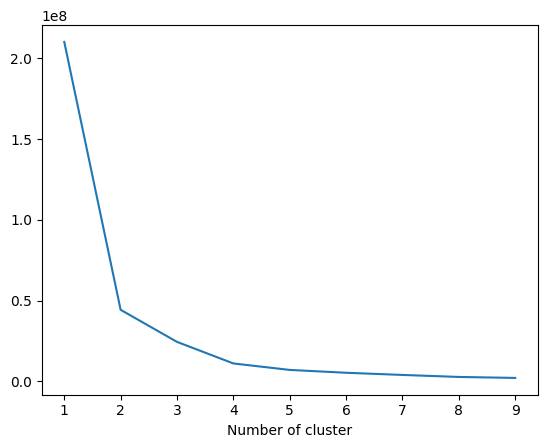

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = customers[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers[['recency']])
customers['RecencyCluster'] = kmeans.predict(customers[['recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customers = order_cluster('RecencyCluster', 'recency',customers,False)


In [ ]:
customers.groupby('RecencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,893.0,779.555431,82.161580,630.0,710.00,784.0,830.0,928.0
1,817.0,480.583843,97.315993,331.0,390.00,491.0,581.0,629.0
2,1210.0,180.462810,94.120406,0.0,99.25,195.0,266.0,330.0


In [ ]:
freq=pd100.groupby('customer_id').Date.count().reset_index()
freq.columns=['customer_id','frequency']

In [ ]:
freq[freq['frequency']==1].shape

(2592, 2)

In [ ]:
customers=pd.merge(customers,freq,on='customer_id')
# customers['frequency'] = customers['frequency_x']
# customers.drop(['frequency_x', 'frequency_y'], axis=1, inplace=True)

In [ ]:
customers.head()

,customer_id,recency,RecencyCluster,frequency
0,5049480577184,864,0,1
1,5052961751200,864,0,1
2,5647451324576,650,0,1
3,5650592497824,650,0,1
4,5647806824608,650,0,1


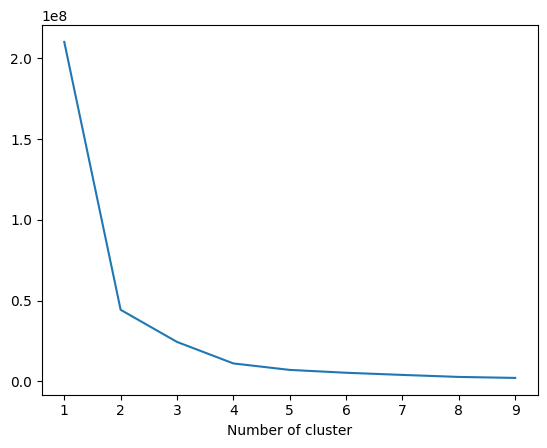

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_frequency = customers[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers[['frequency']])
customers['FrequencyCluster'] = kmeans.predict(customers[['frequency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customers = order_cluster('FrequencyCluster', 'frequency',customers,True)

In [ ]:
customers.groupby('FrequencyCluster')['frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2592.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,309.0,2.207120,0.505632,2.0,2.0,2.0,2.0,4.0
2,19.0,7.684211,3.480942,5.0,5.5,6.0,9.0,18.0


In [ ]:
customers[customers['frequency']==18]

,customer_id,recency,RecencyCluster,frequency,FrequencyCluster
2902,5641578709152,20,2,18,2


In [ ]:
rev=pd100.groupby('customer_id').total_sales.sum().reset_index()

In [ ]:
customers=pd.merge(customers,rev,on='customer_id')

In [ ]:
customers['revenue']=customers['total_sales']
customers.drop(['total_sales'],axis=1,inplace=True)
customers.head()

,customer_id,recency,RecencyCluster,frequency,FrequencyCluster,revenue
0,5049480577184,864,0,1,0,99.97
1,5052961751200,864,0,1,0,431.76
2,5647451324576,650,0,1,0,99.97
3,5650592497824,650,0,1,0,84.98
4,5647806824608,650,0,1,0,99.97


In [ ]:
# customers=customers[customers['revenue']>0]
# customers.head()

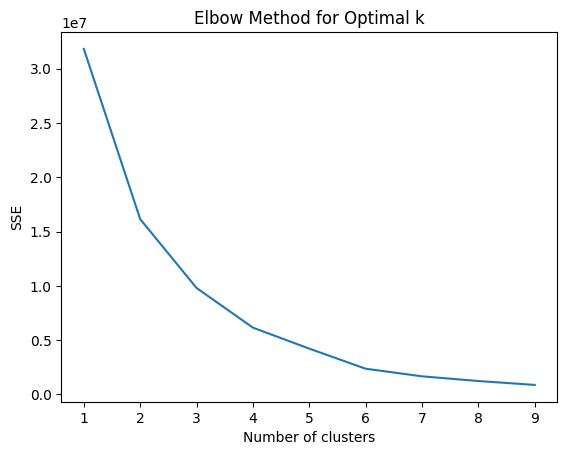

In [ ]:
sse = {}
# Assuming 'recency' and 'revenue' are columns in the 'customers' DataFrame
tx_revenue = customers[['customer_id', 'revenue']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue[['revenue']])
    tx_revenue["clusters"] = kmeans.labels_

    # Merge the clustered 'tx_revenue' DataFrame back to the 'customers' DataFrame
    customers = pd.merge(customers, tx_revenue[['customer_id', 'clusters']], on='customer_id')

    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers[['revenue']])
customers['RevenueCluster'] = kmeans.predict(customers[['revenue']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customers = order_cluster('RevenueCluster','revenue',customers,True)

In [ ]:
customers.groupby('RevenueCluster')['revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,2472.0,86.440206,35.826603,0.00,74.98,89.98,99.97,174.88
1,439.0,265.769795,100.342896,176.49,199.94,219.94,299.91,699.79
2,9.0,1170.463333,527.391968,799.70,839.79,1077.31,1119.58,2519.06


In [ ]:
customers['OverallScore'] = customers['RecencyCluster'] + customers['FrequencyCluster'] + customers['RevenueCluster']
customers.groupby('OverallScore')['recency','frequency','revenue'].mean()

,recency,frequency,revenue
OverallScore,,,
0,782.148352,1.000000,79.557459
1,537.722798,1.076425,113.923769
2,234.622077,1.071094,107.211805
3,207.000000,1.645390,205.025248
4,194.278689,3.229508,262.591311
5,222.571429,5.285714,785.485714
6,20.000000,18.000000,1077.310000


In [ ]:
customers.groupby('OverallScore')['recency','frequency','revenue'].describe()

recency                                                       \
               count        mean         std    min     25%    50%    75%   
OverallScore                                                                
0              728.0  782.148352   81.576134  630.0  712.00  785.0  837.0   
1              772.0  537.722798  152.102552  331.0  413.75  529.0  616.0   
2             1069.0  234.622077  148.826317    0.0  128.00  236.0  292.0   
3              282.0  207.000000  139.269523    6.0  113.50  180.5  271.0   
4               61.0  194.278689  140.365253    6.0   53.00  182.0  264.0   
5                7.0  222.571429  142.351510   82.0  129.00  194.0  260.0   
6                1.0   20.000000         NaN   20.0   20.00   20.0   20.0   

                    frequency             ...             revenue  \
                max     count       mean  ...   75%   max   count   
OverallScore                              ...                       
0             928.0     728.0   1.000000  ...   1.0   1.0   728.0   
1             922.0     772.0   1.076425  ...   1.0   4.0   772.0   
2             755.0    1069.0   1.071094  ...   1.0   4.0  1069.0   
3             720.0     282.0   1.645390  ...   2.0   6.0   282.0   
4             568.0      61.0   3.229508  ...   3.0  13.0    61.0   
5             504.0       7.0   5.285714  ...   6.0  10.0     7.0   
6              20.0       1.0  18.000000  ...  18.0  18.0     1.0   

                                                                              \
                     mean         std      min       25%       50%       75%   
OverallScore                                                                   
0               79.557459   32.154003     0.00    69.980    89.980    99.970   
1              113.923769   74.076619     0.00    79.980    99.970   116.845   
2              107.211805   67.577149     0.00    79.970    99.970   119.970   
3              205.025248  205.260509     0.00   111.070   191.515   257.330   
4              262.591311  119.176017     0.00   204.390   229.940   299.910   
5              785.485714  318.892901   323.91   577.835   839.720   969.730   
6             1077.310000         NaN  1077.31  1077.310  1077.310  1077.310   

                       
                  max  
OverallScore           
0              169.95  
1              599.82  
2              699.79  
3             2519.06  
4              799.70  
5             1239.64  
6             1077.31  

[7 rows x 24 columns]

In [ ]:
# summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
# summary.to_excel('summary.xlsx',index=False)
# files.download('summary.xlsx')

In [ ]:
## Define the conditions and corresponding segment values
conditions = [
    customers['OverallScore'] > 4,
    customers['OverallScore'] > 2,
]
choices = ['High-Value', 'Mid-Value']

# Use np.select to create a new 'Segment' column based on conditions
customers['Segment'] = np.select(conditions, choices, default='Low Value')

customers=pd.merge(customers,pd100[['customer_name','customer_email','customer_id','shipping_region']],on='customer_id')


# Group by 'customer_id' and keep the first row for each customer
customers = customers.groupby('customer_id').first().reset_index()

In [ ]:
# customers=pd.merge(customers,pd100[['customer_name','customer_email','customer_id','shipping_region']],on='customer_id')
# # customers[['Name','email']]=customers[['customer_name_x','customer_email_x']]
customers.drop(['clusters_x','clusters_y'],axis=1,inplace=True)

In [ ]:
# customers[['Name','email']]=customers[['customer_name_x','customer_email_x']]
# customers[['shipping_region']]=customers[['shipping_region_x']]
# customers.drop(['shipping_region_x','shipping_region_y','customer_name_x','customer_name_y','customer_email_x','customer_email_y'])

In [ ]:
customers.columns

Index(['customer_id', 'recency', 'RecencyCluster', 'frequency',
       'FrequencyCluster', 'revenue', 'clusters', 'RevenueCluster',
       'OverallScore', 'Segment', 'customer_name', 'customer_email',
       'shipping_region'],
      dtype='object')

In [ ]:
customers.shape

(2920, 13)

In [ ]:
# customers.to_excel('customers.xlsx',index=False)
# files.download('customers.xlsx')

In [ ]:
target=customers[(customers['Segment']== 'Low Value')|(customers['Segment']== 'Mid-Value')]
target.head()

,customer_id,recency,RecencyCluster,frequency,FrequencyCluster,revenue,clusters,RevenueCluster,OverallScore,Segment,customer_name,customer_email,shipping_region
0,1369515622459,605,1,1,0,99.97,1,0,1,Low Value,Jeff Moe,parcil@themoes.org,Colorado
1,2718279893051,52,2,1,0,199.94,4,1,3,Mid-Value,Zack Sullivan,wadesullivan1404@gmail.com,South Carolina
2,2747204468795,152,2,13,2,99.97,1,0,4,Mid-Value,Cody Voelker,cody@variantecom.com,Indiana
3,3034294321211,596,1,2,1,189.94,4,1,3,Mid-Value,Jesse Flores,tpo731@yahoo.com,Texas
4,3101930618939,234,2,1,0,99.97,1,0,2,Low Value,Jeff Zurek,jzurek5@gmail.com,Nebraska


In [ ]:
target.shape

(2912, 13)

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming you have a DataFrame named 'target' with 'customer_id', 'Recency', 'Frequency', and 'Revenue' columns

# Calculate the number of customers in each group
group_size = len(target) // 3

# Shuffle the customer IDs
shuffled_ids = np.random.permutation(target['customer_id'])

group1_ids = shuffled_ids[:group_size]
group2_ids = shuffled_ids[group_size:2 * group_size]
group3_ids = shuffled_ids[2 * group_size:]

# Split the target DataFrame into groups
group1 = target[target['customer_id'].isin(group1_ids)]
group2 = target[target['customer_id'].isin(group2_ids)]
group3 = target[target['customer_id'].isin(group3_ids)]

# Perform t-tests for Recency, Frequency, and Revenue between groups
recency_p_value_12 = stats.ttest_ind(group1['recency'], group2['recency']).pvalue
recency_p_value_13 = stats.ttest_ind(group1['recency'], group3['recency']).pvalue
recency_p_value_23 = stats.ttest_ind(group2['recency'], group3['recency']).pvalue

frequency_p_value_12 = stats.ttest_ind(group1['frequency'], group2['frequency']).pvalue
frequency_p_value_13 = stats.ttest_ind(group1['frequency'], group3['frequency']).pvalue
frequency_p_value_23 = stats.ttest_ind(group2['frequency'], group3['frequency']).pvalue

revenue_p_value_12 = stats.ttest_ind(group1['revenue'], group2['revenue']).pvalue
revenue_p_value_13 = stats.ttest_ind(group1['revenue'], group3['revenue']).pvalue
revenue_p_value_23 = stats.ttest_ind(group2['revenue'], group3['revenue']).pvalue


In [ ]:
target.columns

Index(['customer_id', 'recency', 'RecencyCluster', 'frequency',
       'FrequencyCluster', 'revenue', 'clusters', 'RevenueCluster',
       'OverallScore', 'Segment', 'customer_name', 'customer_email',
       'shipping_region'],
      dtype='object')

In [ ]:
group1=pd.merge(group1,target[['customer_id','customer_name','customer_email','shipping_region','OverallScore']],
                on='customer_id',how='left')

In [ ]:
group2=pd.merge(group2,target[['customer_id','customer_name','customer_email','shipping_region','OverallScore']],
                on='customer_id',how='left')

In [ ]:
group3=pd.merge(group3,target[['customer_id','customer_name','customer_email','shipping_region','OverallScore']],
                on='customer_id',how='left')

In [ ]:
group3.head()

,customer_id,recency,RecencyCluster,frequency,FrequencyCluster,revenue,clusters,RevenueCluster,OverallScore_x,Segment,customer_name_x,customer_email_x,shipping_region_x,customer_name_y,customer_email_y,shipping_region_y,OverallScore_y
0,3034294321211,596,1,2,1,189.94,4,1,3,Mid-Value,Jesse Flores,tpo731@yahoo.com,Texas,Jesse Flores,tpo731@yahoo.com,Texas,3
1,3174811566139,413,1,2,1,115.47,1,0,2,Low Value,Ronald Stacy,stacysr6@gmail.com,Wisconsin,Ronald Stacy,stacysr6@gmail.com,Wisconsin,2
2,3194943340603,896,0,1,0,0.00,0,0,0,Low Value,Brent Booth,brentbooth930@gmail.com,California,Brent Booth,brentbooth930@gmail.com,California,0
3,3286135963707,265,2,1,0,0.00,0,0,2,Low Value,Linnea Storvold,contact@diycraftclub.com,British Columbia,Linnea Storvold,contact@diycraftclub.com,British Columbia,2
4,3286446112827,851,0,1,0,199.94,4,1,1,Low Value,Joni Ross,leesmanfh@yahoo.com,Illinois,Joni Ross,leesmanfh@yahoo.com,Illinois,1


In [ ]:
group1.to_excel('PD100_NoDiscount.xlsx',index=False)
group2.to_excel('PD100_SmallDiscount.xlsx',index=False)
group3.to_excel('PD100_LargeDiscount.xlsx',index=False)

In [ ]:
files.download('PD100_NoDiscount.xlsx')
files.download('PD100_SmallDiscount.xlsx')
files.download('PD100_LargeDiscount.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LV.drop(['customer_email_x','customer_email_y'],axis=1,inplace=True)

In [ ]:
LV.head()

In [ ]:
import random
from scipy.stats import ttest_ind

# Assuming you have already loaded the data into a pandas DataFrame called 'data'
# Replace 'shipping_region' with the appropriate column name for the states or regions

# Define the desired sample size for test and control groups
sample_size = 550

# Shuffle the entire dataset
shuffled_data = LV.sample(frac=1, random_state=42)

# Split the shuffled data into test and control groups
test_group = shuffled_data.head(sample_size)
control_group = shuffled_data.tail(sample_size)

# Verify the size of test and control groups (they should be the same now)
print("Test Group Size:", len(test_group))
print("Control Group Size:", len(control_group))

# Compute descriptive statistics for 'recency', 'frequency', and 'revenue' between the groups
print("Test Group - Recency Mean:", test_group['recency'].mean())
print("Control Group - Recency Mean:", control_group['recency'].mean())
print("Test Group - Recency Median:", test_group['recency'].median())
print("Control Group - Recency Median:", control_group['recency'].median())

print("Test Group - Frequency Mean:", test_group['frequency'].mean())
print("Control Group - Frequency Mean:", control_group['frequency'].mean())
print("Test Group - Frequency Median:", test_group['frequency'].median())
print("Control Group - Frequency Median:", control_group['frequency'].median())

print("Test Group - Revenue Mean:", test_group['revenue'].mean())
print("Control Group - Revenue Mean:", control_group['revenue'].mean())
print("Test Group - Revenue Median:", test_group['revenue'].median())
print("Control Group - Revenue Median:", control_group['revenue'].median())

# Perform t-tests for 'recency', 'frequency', and 'revenue' to check balance between the groups
t_stat_recency, p_value_recency = ttest_ind(test_group['recency'], control_group['recency'])
t_stat_frequency, p_value_frequency = ttest_ind(test_group['frequency'], control_group['frequency'])
t_stat_revenue, p_value_revenue = ttest_ind(test_group['revenue'], control_group['revenue'])

print("T-statistic for Recency:", t_stat_recency)
print("P-value for Recency:", p_value_recency)
print("T-statistic for Frequency:", t_stat_frequency)
print("P-value for Frequency:", p_value_frequency)
print("T-statistic for Revenue:", t_stat_revenue)
print("P-value for Revenue:", p_value_revenue)


In [ ]:
# test_group.to_excel('pd100test.xlsx')
# control_group.to_excel('pd100control.xlsx')

In [ ]:
# files.download('pd100test.xlsx')
# files.download('pd100control.xlsx')

In [ ]:
MV=customers[customers['Segment']=='Mid-Value']

In [ ]:
MV.head()

In [ ]:
MV.drop(['shipping_region_x','shipping_region_y','customer_name_x','customer_name_y','customer_email_x','customer_email_y'],axis=1,inplace=True)

In [ ]:
MV.shape

In [ ]:
# import scipy.stats as stats

# # Given values
# N = 346
# ES = 0.05
# alpha = 0.05
# beta = 0.80

# # Calculate Z_alpha (two-tailed test)
# Z_alpha = stats.norm.ppf(1 - alpha / 2)

# # Calculate Z_beta
# Z_beta = stats.norm.ppf(1 - beta)

# # Calculate p1 and p2 as probabilities for the control and test groups
# # Assuming equal proportions for a balanced design
# p1 = 0.5
# p2 = p1 + ES

# # Calculate the required sample size
# n = ((p2 - p1)**2) / ((Z_alpha + Z_beta)**2) * (p1*(1 - p1) + p2*(1 - p2)) / (ES**2)

# print("Required Sample Size per Group:", n)
# print("Total Sample Size (Test + Control):", 2 * n)